In [2]:
import tensorflow as tf

hello = tf.constant("Hello World!")

sess = tf.Session()

print(sess.run(hello))

b'Hello World!'


In [1]:
import tensorflow as tf

计算图

In [6]:
node1 = tf.constant(3.0, tf.float32, name="node1")
node2 = tf.constant(4.0, tf.float32, name="node2")
node3 = tf.add(node1, node2)

In [7]:
print(node3)

Tensor("Add:0", shape=(), dtype=float32)


In [8]:
# 建立对话并且显示结果
sess = tf.Session()
print("result", sess.run(node1))

result 3.0


In [9]:
# 更新变量并且返回计算结果
print("result",sess.run(node3))
# 关闭session
sess.close()

result 7.0


张量

In [10]:
print(node3)

Tensor("Add:0", shape=(), dtype=float32)


In [11]:
tens1 = tf.constant([[[1,2,2],[2,2,3]],
                    [[3,4,6],[5,4,3]],
                    [[7,0,1],[9,1,9]],
                    [[11,12,7],[1,3,14]]],name="test1")
print(tens1)

Tensor("test1:0", shape=(4, 2, 3), dtype=int32)


## 张量的形状

In [12]:
scalar = tf.constant(100)
vector = tf.constant([1,2,3,4,5])
matrix = tf.constant([[1,2,3],[4,5,6]])
cube_matrix = tf.constant([[[1],[2],[3]],[[4],[5],[6]],[[7],[8],[9]]])

print(scalar.get_shape())
print(vector.get_shape())
print(matrix.get_shape())
print(cube_matrix.get_shape())

()
(5,)
(2, 3)
(3, 3, 1)


## 获取张量的元素

In [13]:
tens2 = tf.constant([[[1,2],[2,3]],[[3,4],[5,6]]])
sess = tf.Session()
print(sess.run(tens2)[1,1,0])
sess.close()

5


## 张量的类型
- 实数：tf.float32 tf.float64
- 整数：tf.int8 tf.int16 tf.int32 tf.int64 tf.uint8
- 布尔：tf.bool
- 复数：tf.complex64 tf.complex128

In [16]:
a = tf.constant([1,2], name="a")
b = tf.constant([2.0, 3.0], name="b")
result = a + b

TypeError: Input 'y' of 'Add' Op has type float32 that does not match type int32 of argument 'x'.

## Operation 操作

In [17]:
# 添加使用TensorBoard
tf.reset_default_graph()# 清除default graph 和不断增加节点

a = tf.Variable(1, name="a")
b = tf.add(a, 1, name="b")#b=a+1
c = tf.multiply(b, 4, name="c")#c=b*4
d = tf.subtract(c, b, name="d")#d=c-b

#set logdir
logdir = 'log'

writer = tf.summary.FileWriter(logdir, tf.get_default_graph())
writer.close()

终端进入log目录上层

tensorboard --logdir=log

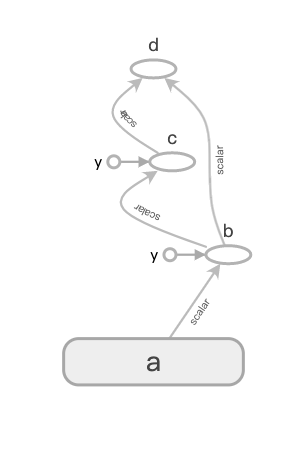

## Session 会话

In [19]:
#定义计算图
tens1 = tf.constant([1, 2, 3])
#创建会话
sess = tf.Session()
#得到张量的值
print(sess.run(tens1))
#s释放资源
sess.close()

[1 2 3]


In [20]:
#定义计算图
tens1 = tf.constant([1, 2, 3])
#创建会话
sess = tf.Session()
#得到张量的值
try:
    print(sess.run(tens1))
except:
    print("Exception!")
finally:
    
#s释放资源
    sess.close()

[1 2 3]


In [21]:
node1 = tf.constant(3.0, tf.float32, name="node1")
node2 = tf.constant(4.0, tf.float32, name="node2")
node3 = tf.add(node1, node2)
with tf.Session() as sess:
    print(sess.run(node3))

7.0


In [25]:
node1 = tf.constant(3.0, tf.float32, name="node1")
node2 = tf.constant(4.0, tf.float32, name="node2")
node3 = tf.add(node1, node2)
sess = tf.Session()
with sess.as_default():
    print(sess.run(node3))

7.0


In [26]:
sess = tf.Session()
print(sess.run(node3))
print(node3.eval(session=sess))

7.0
7.0


交互式环境设置默认对话

In [28]:
node1 = tf.constant(3.0, tf.float32, name="node1")
node2 = tf.constant(4.0, tf.float32, name="node2")
node3 = tf.add(node1, node2)
sess = tf.InteractiveSession()
print(node3.eval())
sess.close()

7.0


/anaconda3/envs/dl/lib/python3.6/site-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


## 常量与变量
常量：
```python
constant_ name = tf.constant(value)
```
变量：
```python
# 创建语句
name_variable = tf.Variable(value, name)
# 个别变量初始化
init_op = name_variable.initializer()
# 所有变量初始化
init_op = tf.global_variables_initializer()
```

In [29]:
a = tf.constant(1.0, name="a")
b = tf.constant(2.5, name="b")
c = tf.add(a, b, name="c")

sess = tf.Session()
c_value = sess.run(c)
print(c_value)
sess.close()

3.5


In [30]:
node1 = tf.constant(3.0, tf.float32, name="node1")
node2 = tf.constant(4.0, tf.float32, name="node2")
node3 = tf.add(node1, node2, name="add")
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
print(sess.run(node3))

7.0


In [2]:
node1 = tf.constant(3.0, tf.float32, name="node1")
node2 = tf.constant(4.0, tf.float32, name="node2")
node3 = tf.add(node1, node2, name="add")
sess = tf.Session()
init = tf.global_variables_initializer()

print(sess.run(node3))

7.0


## 变量赋值

自动调整：
```

epoch = tf.Variable(0, name='epoch', trainable=False)

# 需要人工更新的情况,可用变量赋值语句
# 变量更新语句：

update_op = tf.assign(variable_to_be_updated, new_value)
```


In [5]:
# 通过变量赋值输出1、2、3…10
import tensorflow as tf

value = tf.Variable(0, name="value")
one = tf.constant(1)
new_value = tf.add(value, one)
update_value = tf.assign(value, new_value)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for _ in range(10):
        sess.run(update_value)
        print(sess.run(value))

1
2
3
4
5
6
7
8
9
10


In [7]:
# 通过变量赋值输出1、2、3…10
import tensorflow as tf

value = tf.Variable(0, name="value")# 变量0（ai
value1 = tf.Variable(0, name="value")#变量和（S
one = tf.constant(1)# 常量1
new_value = tf.add(value, one)# value, one 相加a_i+1=a_i +1
update_value = tf.assign(value, new_value)# value->new_value
new1_value = tf.add(value1,)
sum_value = tf.assign(value1,update_value)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for _ in range(10):
        sess.run(sum_value)
        print(sess.run(value1))
        
        

1
2
3
4
5
6
7
8
9
10


In [11]:
import tensorflow as tf

value = tf.Variable(0, name="value")# 变量指针
one = tf.constant(1)# 常量
new_value = tf.add(value, one)# 变量加一即新值
sum_value = tf.add(value, new_value)# 
update_value = tf.assign(value, new_value)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for _ in range(10):
        sess.run(update_value)
        print(sess.run(value))

1
2
3
4
5
6
7
8
9
10


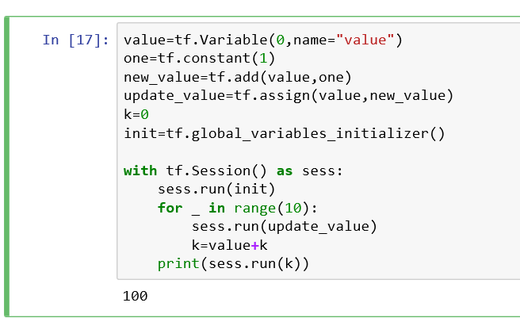